In [8]:
import random
import matplotlib.pyplot as plt
from collections import Counter

In [9]:
# Load the list of possible words from the file
with open('Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [10]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [11]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [12]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [13]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [14]:
# Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
                # great_starting_word_attempts = attempts
            break

word #1: freak
attempt: 5
word #2: reedy
attempt: 5
word #3: fewer
attempt: 6
word #4: gorge
attempt: 5
word #5: usual
attempt: 3
word #6: swami
attempt: 5
word #7: known
attempt: 5
word #8: hound
attempt: 7
word #9: cycle
attempt: 4
word #10: aloud
attempt: 4
word #11: truer
attempt: 5
word #12: itchy
attempt: 5
word #13: lapse
attempt: 3
word #14: neigh
attempt: 3
word #15: froze
attempt: 4
word #16: whiff
attempt: 4
word #17: quilt
attempt: 5
word #18: moult
attempt: 3
word #19: table
attempt: 5
word #20: again
attempt: 4
word #21: spilt
attempt: 4
word #22: quash
attempt: 5
word #23: enjoy
attempt: 5
word #24: juicy
attempt: 4
word #25: knelt
attempt: 4
word #26: decoy
attempt: 4
word #27: angle
attempt: 4
word #28: chalk
attempt: 3
word #29: harem
attempt: 4
word #30: dress
attempt: 5
word #31: aloud
attempt: 5
word #32: missy
attempt: 3
word #33: goody
attempt: 5
word #34: dying
attempt: 3
word #35: dogma
attempt: 3
word #36: owing
attempt: 5
word #37: parry
attempt: 4
word #38: 

In [15]:
top_ten_words = []
word_count = 0

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

def evaluate_word(word, letter_frequencies, repeat_penalty=0.5):
    # Calculate the frequency of each letter in the given word
    word_frequencies = Counter(word.lower())
    
    # Calculate the score for the word based on letter frequencies
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
# best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Word Scores:")
for word, score in sorted_words:
    print(f"{word}: {score}")
    word_count+=1
    if word_count<=10:
        top_ten_words.append(word)

# print("\nBest Word for the First Word in Wordle:")
# print(sorted_words[0][0])

Word Scores:
anode: 39.378
elite: 39.1
inane: 37.958499999999994
unset: 37.592
snide: 36.997
spite: 36.98
naive: 35.562000000000005
depot: 35.446999999999996
sense: 35.292500000000004
nosey: 35.25899999999999
riser: 34.9755
reuse: 34.125
felon: 33.211
regal: 32.896
slope: 32.49
crept: 32.455999999999996
tapir: 32.105
reedy: 31.267
worst: 31.236999999999995
hazel: 31.061999999999998
adopt: 30.912
fence: 30.812
breed: 30.785000000000004
first: 30.564
brake: 30.119999999999997
maple: 29.229
dodge: 28.6035
bribe: 27.893
voila: 27.643
thick: 26.669999999999998
covey: 25.943
begun: 25.715999999999998
corny: 24.999
local: 24.493499999999997
amass: 24.147
clang: 23.738
sloop: 23.5415
vinyl: 20.692
group: 20.195999999999998
filly: 17.2055
buxom: 14.413


list #0 word #1: caulk
attempt: 3
list #0 word #2: truly
attempt: 3
list #0 word #3: brunt
attempt: 4
list #0 word #4: aorta
attempt: 3
list #0 word #5: ionic
attempt: 5
list #0 word #6: buxom
attempt: 3
list #0 word #7: stair
attempt: 4
list #0 word #8: water
attempt: 7
list #0 word #9: refit
attempt: 4
list #0 word #10: godly
attempt: 3
list #0 word #11: zesty
attempt: 4
list #0 word #12: album
attempt: 3
list #0 word #13: curse
attempt: 4
list #0 word #14: nerdy
attempt: 3
list #0 word #15: dingo
attempt: 2
list #0 word #16: preen
attempt: 3
list #0 word #17: viper
attempt: 4
list #0 word #18: cobra
attempt: 4
list #0 word #19: bound
attempt: 4
list #0 word #20: aging
attempt: 4
list #0 word #21: sissy
attempt: 4
list #0 word #22: maize
attempt: 4
list #0 word #23: magic
attempt: 4
list #0 word #24: acrid
attempt: 3
list #0 word #25: issue
attempt: 5
list #0 word #26: uncut
attempt: 3
list #0 word #27: grunt
attempt: 4
list #0 word #28: crept
attempt: 5
list #0 word #29: plank
attem

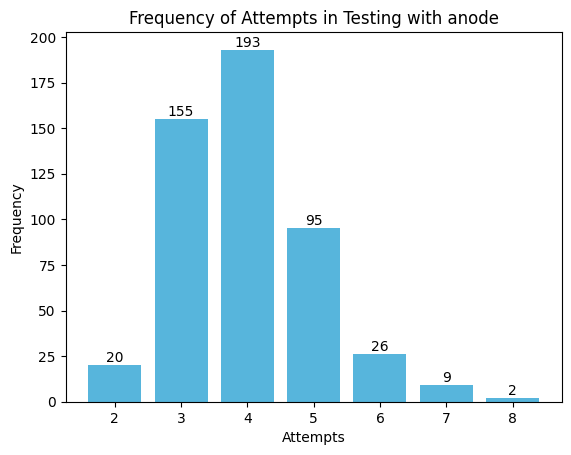

list #1 word #1: caulk
attempt: 4
list #1 word #2: truly
attempt: 3
list #1 word #3: brunt
attempt: 5
list #1 word #4: aorta
attempt: 3
list #1 word #5: ionic
attempt: 5
list #1 word #6: buxom
attempt: 5
list #1 word #7: stair
attempt: 4
list #1 word #8: water
attempt: 4
list #1 word #9: refit
attempt: 3
list #1 word #10: godly
attempt: 3
list #1 word #11: zesty
attempt: 3
list #1 word #12: album
attempt: 3
list #1 word #13: curse
attempt: 3
list #1 word #14: nerdy
attempt: 3
list #1 word #15: dingo
attempt: 4
list #1 word #16: preen
attempt: 5
list #1 word #17: viper
attempt: 5
list #1 word #18: cobra
attempt: 4
list #1 word #19: bound
attempt: 4
list #1 word #20: aging
attempt: 3
list #1 word #21: sissy
attempt: 4
list #1 word #22: maize
attempt: 5
list #1 word #23: magic
attempt: 4
list #1 word #24: acrid
attempt: 3
list #1 word #25: issue
attempt: 3
list #1 word #26: uncut
attempt: 4
list #1 word #27: grunt
attempt: 4
list #1 word #28: crept
attempt: 5
list #1 word #29: plank
attem

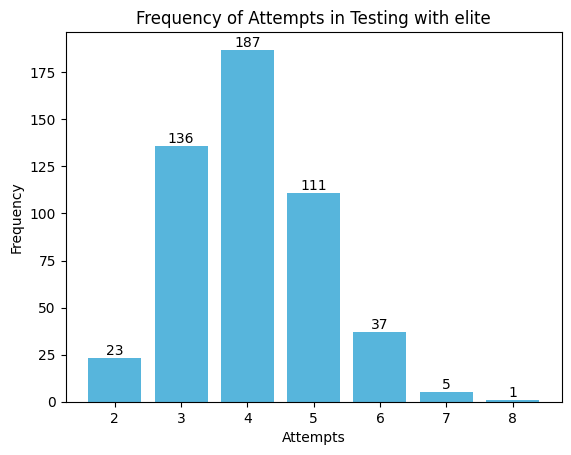

list #2 word #1: caulk
attempt: 3
list #2 word #2: truly
attempt: 4
list #2 word #3: brunt
attempt: 3
list #2 word #4: aorta
attempt: 4
list #2 word #5: ionic
attempt: 2
list #2 word #6: buxom
attempt: 3
list #2 word #7: stair
attempt: 3
list #2 word #8: water
attempt: 6
list #2 word #9: refit
attempt: 3
list #2 word #10: godly
attempt: 3
list #2 word #11: zesty
attempt: 4
list #2 word #12: album
attempt: 4
list #2 word #13: curse
attempt: 5
list #2 word #14: nerdy
attempt: 4
list #2 word #15: dingo
attempt: 4
list #2 word #16: preen
attempt: 4
list #2 word #17: viper
attempt: 4
list #2 word #18: cobra
attempt: 5
list #2 word #19: bound
attempt: 9
list #2 word #20: aging
attempt: 3
list #2 word #21: sissy
attempt: 6
list #2 word #22: maize
attempt: 2
list #2 word #23: magic
attempt: 5
list #2 word #24: acrid
attempt: 4
list #2 word #25: issue
attempt: 2
list #2 word #26: uncut
attempt: 3
list #2 word #27: grunt
attempt: 4
list #2 word #28: crept
attempt: 4
list #2 word #29: plank
attem

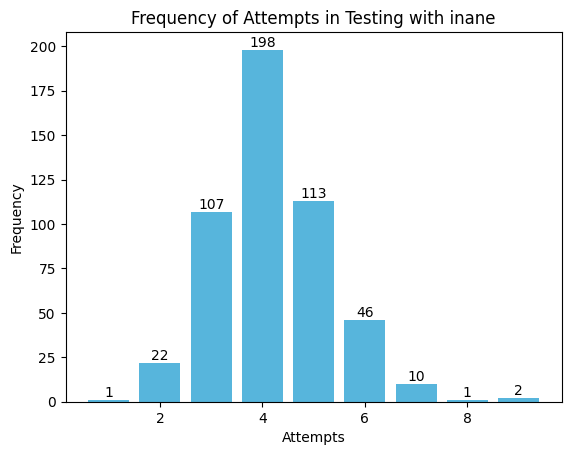

list #3 word #1: caulk
attempt: 4
list #3 word #2: truly
attempt: 4
list #3 word #3: brunt
attempt: 4
list #3 word #4: aorta
attempt: 4
list #3 word #5: ionic
attempt: 5
list #3 word #6: buxom
attempt: 3
list #3 word #7: stair
attempt: 4
list #3 word #8: water
attempt: 4
list #3 word #9: refit
attempt: 4
list #3 word #10: godly
attempt: 3
list #3 word #11: zesty
attempt: 3
list #3 word #12: album
attempt: 5
list #3 word #13: curse
attempt: 3
list #3 word #14: nerdy
attempt: 5
list #3 word #15: dingo
attempt: 5
list #3 word #16: preen
attempt: 5
list #3 word #17: viper
attempt: 5
list #3 word #18: cobra
attempt: 4
list #3 word #19: bound
attempt: 4
list #3 word #20: aging
attempt: 4
list #3 word #21: sissy
attempt: 4
list #3 word #22: maize
attempt: 4
list #3 word #23: magic
attempt: 3
list #3 word #24: acrid
attempt: 4
list #3 word #25: issue
attempt: 2
list #3 word #26: uncut
attempt: 3
list #3 word #27: grunt
attempt: 4
list #3 word #28: crept
attempt: 3
list #3 word #29: plank
attem

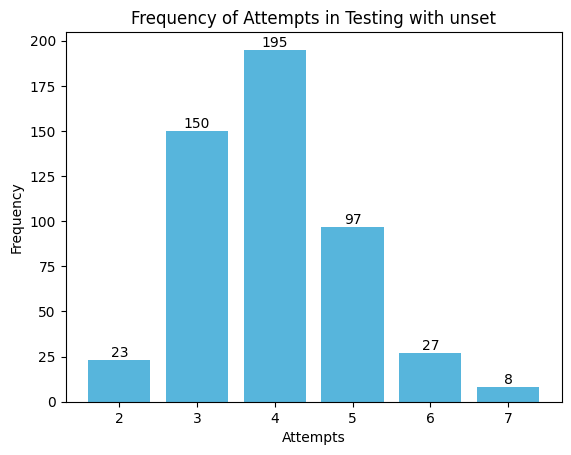

list #4 word #1: caulk
attempt: 4
list #4 word #2: truly
attempt: 3
list #4 word #3: brunt
attempt: 4
list #4 word #4: aorta
attempt: 5
list #4 word #5: ionic
attempt: 4
list #4 word #6: buxom
attempt: 4
list #4 word #7: stair
attempt: 3
list #4 word #8: water
attempt: 4
list #4 word #9: refit
attempt: 4
list #4 word #10: godly
attempt: 3
list #4 word #11: zesty
attempt: 3
list #4 word #12: album
attempt: 4
list #4 word #13: curse
attempt: 3
list #4 word #14: nerdy
attempt: 3
list #4 word #15: dingo
attempt: 2
list #4 word #16: preen
attempt: 3
list #4 word #17: viper
attempt: 2
list #4 word #18: cobra
attempt: 3
list #4 word #19: bound
attempt: 6
list #4 word #20: aging
attempt: 4
list #4 word #21: sissy
attempt: 4
list #4 word #22: maize
attempt: 4
list #4 word #23: magic
attempt: 3
list #4 word #24: acrid
attempt: 3
list #4 word #25: issue
attempt: 3
list #4 word #26: uncut
attempt: 3
list #4 word #27: grunt
attempt: 5
list #4 word #28: crept
attempt: 5
list #4 word #29: plank
attem

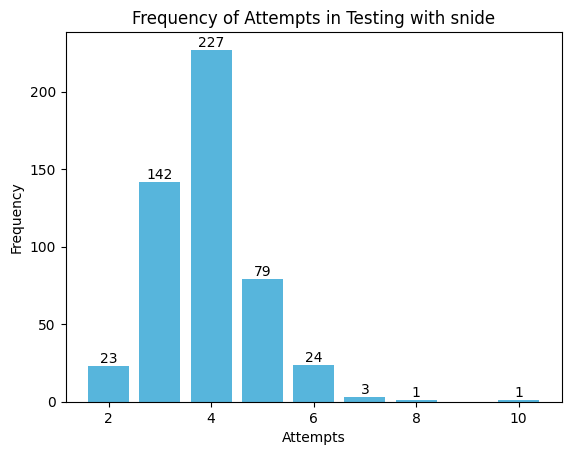

list #5 word #1: caulk
attempt: 3
list #5 word #2: truly
attempt: 4
list #5 word #3: brunt
attempt: 4
list #5 word #4: aorta
attempt: 4
list #5 word #5: ionic
attempt: 4
list #5 word #6: buxom
attempt: 4
list #5 word #7: stair
attempt: 5
list #5 word #8: water
attempt: 4
list #5 word #9: refit
attempt: 5
list #5 word #10: godly
attempt: 4
list #5 word #11: zesty
attempt: 3
list #5 word #12: album
attempt: 4
list #5 word #13: curse
attempt: 3
list #5 word #14: nerdy
attempt: 4
list #5 word #15: dingo
attempt: 4
list #5 word #16: preen
attempt: 2
list #5 word #17: viper
attempt: 3
list #5 word #18: cobra
attempt: 4
list #5 word #19: bound
attempt: 5
list #5 word #20: aging
attempt: 7
list #5 word #21: sissy
attempt: 3
list #5 word #22: maize
attempt: 4
list #5 word #23: magic
attempt: 6
list #5 word #24: acrid
attempt: 3
list #5 word #25: issue
attempt: 2
list #5 word #26: uncut
attempt: 3
list #5 word #27: grunt
attempt: 3
list #5 word #28: crept
attempt: 3
list #5 word #29: plank
attem

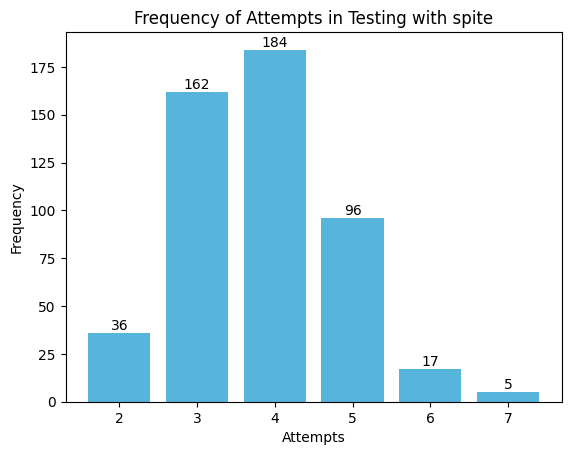

list #6 word #1: caulk
attempt: 4
list #6 word #2: truly
attempt: 4
list #6 word #3: brunt
attempt: 4
list #6 word #4: aorta
attempt: 3
list #6 word #5: ionic
attempt: 4
list #6 word #6: buxom
attempt: 3
list #6 word #7: stair
attempt: 3
list #6 word #8: water
attempt: 5
list #6 word #9: refit
attempt: 2
list #6 word #10: godly
attempt: 4
list #6 word #11: zesty
attempt: 3
list #6 word #12: album
attempt: 5
list #6 word #13: curse
attempt: 4
list #6 word #14: nerdy
attempt: 3
list #6 word #15: dingo
attempt: 4
list #6 word #16: preen
attempt: 4
list #6 word #17: viper
attempt: 2
list #6 word #18: cobra
attempt: 4
list #6 word #19: bound
attempt: 4
list #6 word #20: aging
attempt: 3
list #6 word #21: sissy
attempt: 4
list #6 word #22: maize
attempt: 2
list #6 word #23: magic
attempt: 3
list #6 word #24: acrid
attempt: 4
list #6 word #25: issue
attempt: 3
list #6 word #26: uncut
attempt: 4
list #6 word #27: grunt
attempt: 5
list #6 word #28: crept
attempt: 4
list #6 word #29: plank
attem

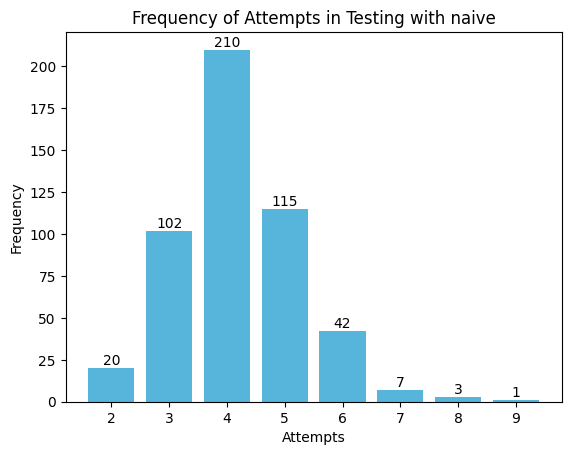

list #7 word #1: caulk
attempt: 5
list #7 word #2: truly
attempt: 3
list #7 word #3: brunt
attempt: 5
list #7 word #4: aorta
attempt: 3
list #7 word #5: ionic
attempt: 6
list #7 word #6: buxom
attempt: 4
list #7 word #7: stair
attempt: 5
list #7 word #8: water
attempt: 7
list #7 word #9: refit
attempt: 4
list #7 word #10: godly
attempt: 4
list #7 word #11: zesty
attempt: 2
list #7 word #12: album
attempt: 4
list #7 word #13: curse
attempt: 5
list #7 word #14: nerdy
attempt: 4
list #7 word #15: dingo
attempt: 3
list #7 word #16: preen
attempt: 4
list #7 word #17: viper
attempt: 5
list #7 word #18: cobra
attempt: 3
list #7 word #19: bound
attempt: 5
list #7 word #20: aging
attempt: 4
list #7 word #21: sissy
attempt: 4
list #7 word #22: maize
attempt: 6
list #7 word #23: magic
attempt: 4
list #7 word #24: acrid
attempt: 3
list #7 word #25: issue
attempt: 4
list #7 word #26: uncut
attempt: 3
list #7 word #27: grunt
attempt: 5
list #7 word #28: crept
attempt: 3
list #7 word #29: plank
attem

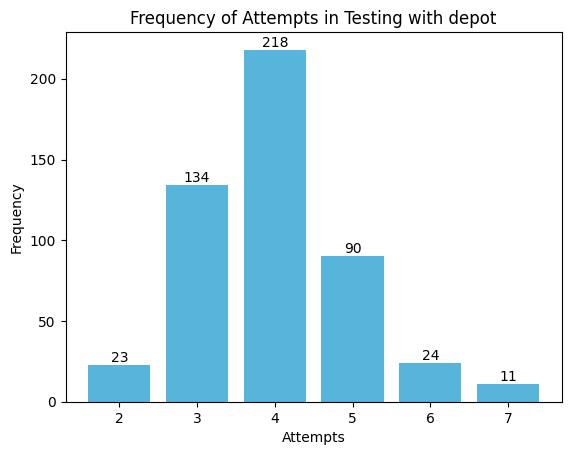

list #8 word #1: caulk
attempt: 4
list #8 word #2: truly
attempt: 5
list #8 word #3: brunt
attempt: 4
list #8 word #4: aorta
attempt: 4
list #8 word #5: ionic
attempt: 5
list #8 word #6: buxom
attempt: 4
list #8 word #7: stair
attempt: 6
list #8 word #8: water
attempt: 4
list #8 word #9: refit
attempt: 4
list #8 word #10: godly
attempt: 4
list #8 word #11: zesty
attempt: 2
list #8 word #12: album
attempt: 4
list #8 word #13: curse
attempt: 5
list #8 word #14: nerdy
attempt: 3
list #8 word #15: dingo
attempt: 5
list #8 word #16: preen
attempt: 5
list #8 word #17: viper
attempt: 4
list #8 word #18: cobra
attempt: 4
list #8 word #19: bound
attempt: 4
list #8 word #20: aging
attempt: 4
list #8 word #21: sissy
attempt: 3
list #8 word #22: maize
attempt: 5
list #8 word #23: magic
attempt: 5
list #8 word #24: acrid
attempt: 4
list #8 word #25: issue
attempt: 2
list #8 word #26: uncut
attempt: 5
list #8 word #27: grunt
attempt: 4
list #8 word #28: crept
attempt: 4
list #8 word #29: plank
attem

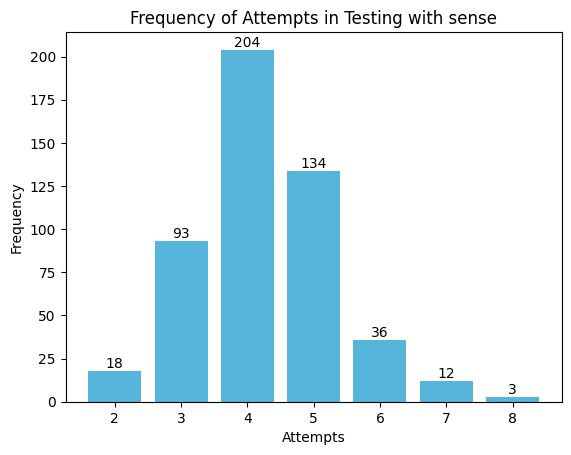

list #9 word #1: caulk
attempt: 3
list #9 word #2: truly
attempt: 3
list #9 word #3: brunt
attempt: 4
list #9 word #4: aorta
attempt: 5
list #9 word #5: ionic
attempt: 4
list #9 word #6: buxom
attempt: 3
list #9 word #7: stair
attempt: 4
list #9 word #8: water
attempt: 7
list #9 word #9: refit
attempt: 4
list #9 word #10: godly
attempt: 4
list #9 word #11: zesty
attempt: 3
list #9 word #12: album
attempt: 4
list #9 word #13: curse
attempt: 3
list #9 word #14: nerdy
attempt: 3
list #9 word #15: dingo
attempt: 3
list #9 word #16: preen
attempt: 4
list #9 word #17: viper
attempt: 5
list #9 word #18: cobra
attempt: 4
list #9 word #19: bound
attempt: 9
list #9 word #20: aging
attempt: 5
list #9 word #21: sissy
attempt: 4
list #9 word #22: maize
attempt: 4
list #9 word #23: magic
attempt: 4
list #9 word #24: acrid
attempt: 4
list #9 word #25: issue
attempt: 3
list #9 word #26: uncut
attempt: 3
list #9 word #27: grunt
attempt: 4
list #9 word #28: crept
attempt: 5
list #9 word #29: plank
attem

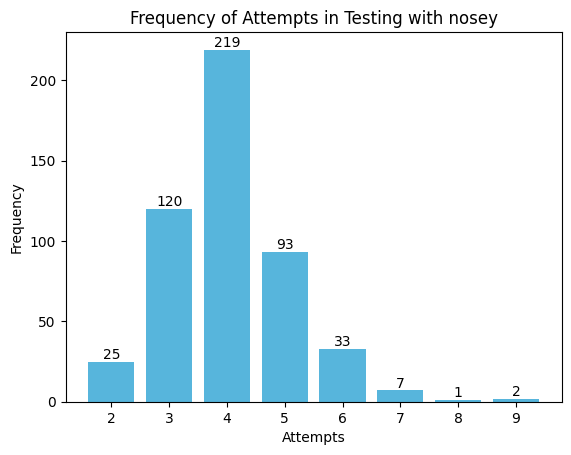

In [16]:
# Testing phase
avg_attempts = []
testing_set_size = 500  # Adjust as needed
testing_set = []
testing_set = [choose_random_word(testing_set) for _ in range(testing_set_size)]

for best_word in top_ten_words:
    testing_attempts = []
    word = 0
    the_word = None

    best_starting_word = []
    best_starting_word_attempts = float('inf')

    for target_word in testing_set:
        attempts = 0
        previous_guesses = []
        word += 1
        print(f"list #{top_ten_words.index(best_word)} word #{word}: {target_word}")

        while True:
            attempts += 1
            guess = bayesian_choose_word(possible_words, previous_guesses)
            
            if attempts == 1:
                guess = best_word
                the_word = guess
            # elif attempts == 2:
            #     the_word = guess
            
            feedback = evaluate_guess(target_word, guess)
            previous_guesses.append((guess, feedback))
            if target_word == guess:
                print(f"attempt: {attempts}")
                testing_attempts.append(attempts)
                if attempts < 3:
                    best_starting_word.append(the_word)
                    # best_starting_word_attempts = attempts
                break
    avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)
    avg_attempts.append(avg_testing_attempts)

    # Testing Data Graph
    unique_elements, counts = [], []

    for item in set(testing_attempts):
        unique_elements.append(item)
        counts.append(testing_attempts.count(item))

    plt.bar(unique_elements, counts, color='#57b5dc')

    for i, count in enumerate(counts):
        plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

    plt.xlabel('Attempts')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Attempts in Testing with {best_word}')

    plt.show()

In [17]:
best_word = top_ten_words[int(avg_attempts.index(min(avg_attempts)))]

print(f"best_word: {best_word}")
print(f"avg_attempt for best_word: {min(avg_attempts)}")

best_word: spite
avg_attempt for best_word: 3.822


In [18]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {min(avg_attempts):.2f}")

Average attempts during training: 4.07
Average attempts during testing: 3.82


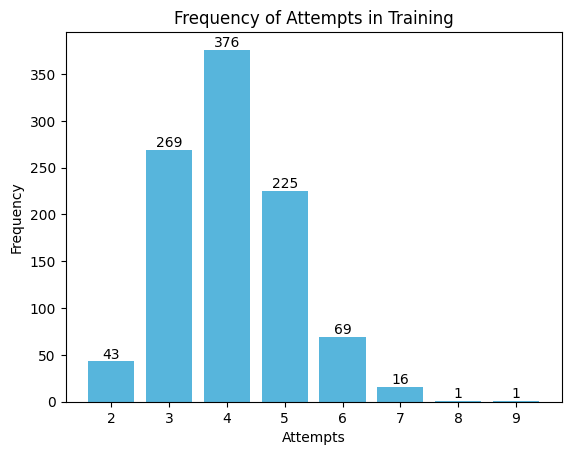

In [19]:
# Training Data Graph
unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

plt.show()

In [20]:
# Main game loop
attempts = 0
previous_guesses = []

print("Let's Play Wordle!")
print("Please think of a word and provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Let's Play Wordle!
Please think of a word and provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛🟨🟨⬛🟨
⬛🟩⬛🟩🟨
⬛🟩🟨🟩⬛
🟩🟩🟩🟩🟩
Congratulations! The word was 'pixel'. It took 4 attempts to guess.
